# Social Media Sentiment Analysis

<h3>Objective:</h3> 
<p>The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.</p>

<p>Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, our objective is to predict the labels on the test dataset.</p>

<h3>Importing Libraries</h3>

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
%matplotlib inline

<h3>Data Exploration</h3>

In [2]:
train_data = pd.read_csv(r"F:\Internship\Project_data\train_data.csv")

In [3]:
test_data = pd.read_csv(r"F:\Internship\Project_data\test_data.csv")

In [5]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train_data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
test_data.isna().sum()

id       0
tweet    0
dtype: int64

In [7]:
train_data.shape

(31962, 3)

In [8]:
test_data.shape

(17197, 2)

In [9]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<h3>Combining Training and Testing Dataset</h3>

In [10]:
data = train_data.append(test_data, ignore_index = True, sort = False)

In [11]:
data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [12]:
data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


<h3>Data Pre-Processing</h3>

<h4>Removing Twitter handles</h4>

In [14]:
def remove_handles(tweet, handle):
    r = re.findall(handle, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
        
    return tweet

In [15]:
data['Tidy_Tweet'] = np.vectorize(remove_handles)(data['tweet'], "@[\w]*") 
data.head()

,id,label,tweet,Tidy_Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


<h4>Removing Punctuations, Numbers and Special Characters</h4>

In [16]:
data['Tidy_Tweet'] = data['Tidy_Tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,label,tweet,Tidy_Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


<h4>Removing Short Words</h4>

In [17]:
data['Tidy_Tweet'] = data['Tidy_Tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

In [18]:
data.head()

,id,label,tweet,Tidy_Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


<h4>Normalizing:</h4>
<p>Tokenization is the process of splitting a string of text into tokens.</p>

In [19]:
tokenized_tweet = data['Tidy_Tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweet, dtype: object

<p>Stemming is a rule-based process of stripping the suffixes(“ing”, “ly”, “es”, “s” etc) from a word.</p>

In [20]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweet, dtype: object

Stitching the texts together

In [21]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['Tidy_Tweet'] = tokenized_tweet
data.head()

,id,label,tweet,Tidy_Tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


<h3>Data Visualization</h3>

Word cloud is a visualization technique where the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [22]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

Visualizing positive texts

In [23]:
positive_words = ' '.join(text for text in data['Tidy_Tweet'][data['label']==0])

In [24]:
positive_mask = np.array(Image.open(r"F:\Internship\Project_data\positive.png"))
positive_mask.shape

(493, 506, 4)

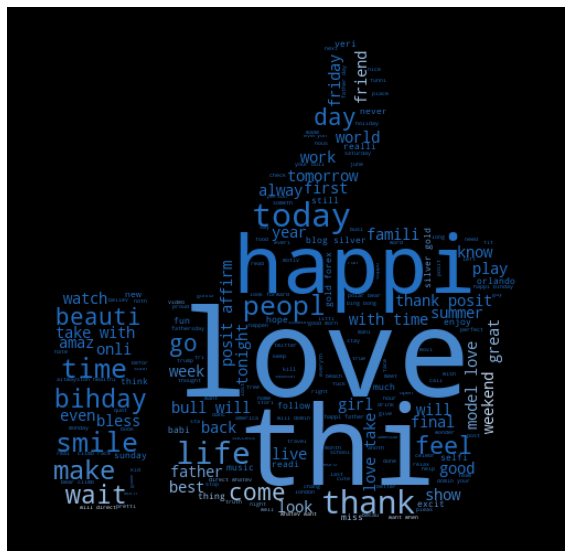

In [25]:
wc_2 = WordCloud(background_color="black", mask = positive_mask, width = 1600, height = 900).generate(positive_words)
image_colors = ImageColorGenerator(positive_mask)

plt.figure(figsize=[10,15]) 
plt.imshow(wc_2.recolor(color_func=image_colors), interpolation ='hamming') 
plt.axis("off")
plt.show()

Visualizing negative texts

In [26]:
negative_words = ' '.join(text for text in data['Tidy_Tweet'][data['label']==1])

In [27]:
negative_mask = np.array(Image.open(r"F:\Internship\Project_data\negative.png"))
negative_mask.shape

(493, 506, 4)

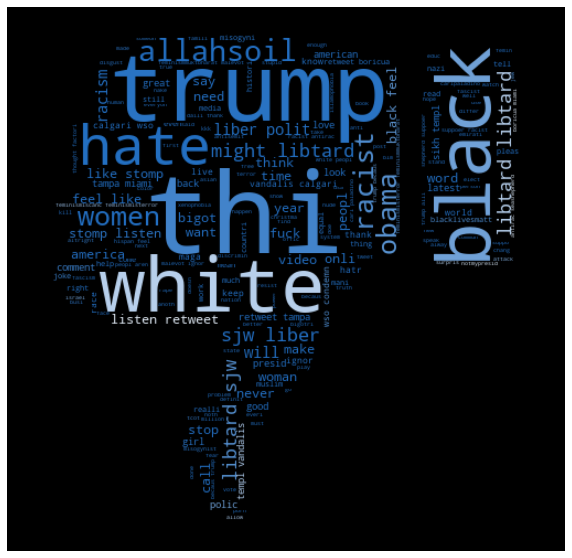

In [28]:
wc_2 = WordCloud(background_color="black", mask = negative_mask, width = 1600, height = 900).generate(negative_words)
image_colors = ImageColorGenerator(negative_mask)

plt.figure(figsize=[10,15]) 
plt.imshow(wc_2.recolor(color_func=image_colors), interpolation ='hamming') 
plt.axis("off")
plt.show()

Understanding the impact of hashtags on tweet's sentiment

In [29]:
def extract_hashtags(x):
    hashtags=[]
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags

In [30]:
positive_hashtags = extract_hashtags(data['Tidy_Tweet'][data['label']==0])

In [31]:
unnest_positive_hashtags = sum(positive_hashtags,[])

In [32]:
negative_hashtags = extract_hashtags(data['Tidy_Tweet'][data['label']==1])

In [33]:
unnest_negative_hashtags = sum(negative_hashtags,[])

For positive tweets in the dataset

In [34]:
positive_freq = nltk.FreqDist(unnest_positive_hashtags)

In [35]:
df_positive = pd.DataFrame({'Hashtags':list(positive_freq.keys()),'Count':list(positive_freq.values())})

In [36]:
df_positive

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19490,kamp,1
19491,ucsd,1
19492,berlincitygirl,1
19493,genf,1


In [37]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

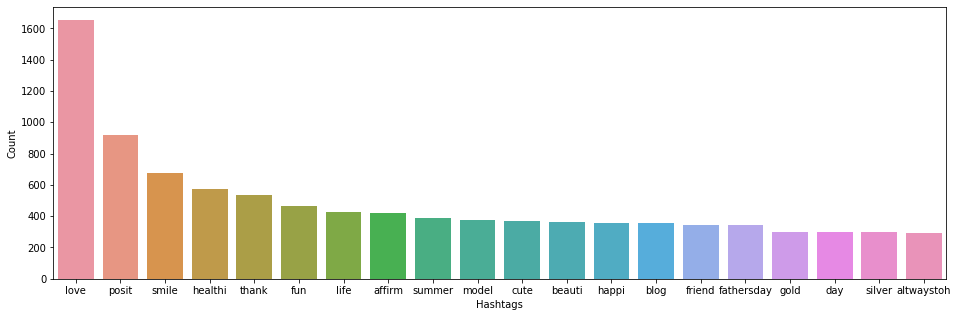

In [38]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_positive_plot, x= "Hashtags", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

For negative tweets in the dataset

In [39]:
negative_freq = nltk.FreqDist(unnest_negative_hashtags)

In [40]:
df_negative = pd.DataFrame({'Hashtags':list(negative_freq.keys()),'Count':list(negative_freq.values())})

In [41]:
df_negative

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


In [42]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

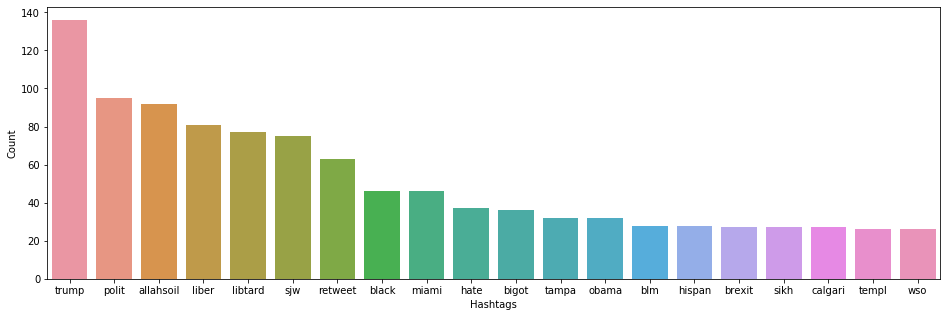

In [43]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df_negative_plot, x= "Hashtags", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

<h3>Extracting Features from Cleaned Tweets</h3>
<h3>Word Embeddings</h3>

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['Tidy_Tweet'])

In [45]:
df_bow = pd.DataFrame(bow.todense())

In [46]:
df_bow.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_bow.shape

(49159, 1000)

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(data['Tidy_Tweet'])

In [49]:
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using the features from Bag-of-Words Model for training set

In [50]:
train_bow = bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Using features from TF-IDF for training set

In [51]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

<h3>Building ML Models</h3>

Splitting the data into training and test set

In [53]:
from sklearn.model_selection import train_test_split

Using Bag-of-Words Features

In [54]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(train_bow, train_data['label'], test_size=0.3, random_state=2)

Using TF-IDF features

In [55]:
x_train_tfidf, x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(train_tfidf_matrix, train_data['label'], test_size=0.3, random_state=17)

In [56]:
x_train_bow = x_train_bow.todense()
x_test_bow = x_test_bow.todense()

In [57]:
x_train_tfidf = x_train_tfidf.todense()
x_test_tfidf = x_test_tfidf.todense()

In [58]:
from sklearn.metrics import f1_score

<h2>Naive Bayes</h2>

In [59]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

Bag-of-Words Features

In [61]:
mnb.fit(x_train_bow, y_train_bow)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
mnb_bow_predict = mnb.predict_proba(x_test_bow)

In [86]:
mnb_bow_predict = mnb_bow_predict[:,1]>=0.3
mnb_int_bow = mnb_bow_predict.astype(np.int)
mnb_score_bow = f1_score(y_test_bow, mnb_int_bow)
mnb_score_bow

0.5460483344219464

TF-IDF Features

In [63]:
mnb.fit(x_train_tfidf, y_train_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
mnb_tfidf_predict = mnb.predict_proba(x_test_tfidf)

In [65]:
mnb_tfidf_predict = mnb_tfidf_predict[:,1]>=0.3
mnb_int_tfidf = mnb_tfidf_predict.astype(np.int)
mnb_score_tfidf = f1_score(y_test_tfidf, mnb_int_tfidf)
mnb_score_tfidf

0.551111111111111

<h2>SVM</h2>

In [76]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, probability=True)

Bag-of-Words Features

In [77]:
svm.fit(x_train_bow, y_train_bow)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [79]:
predict_bow = svm.predict_proba(x_test_bow)
predict_int_bow = predict_bow[:,1] >= 0.3
predict_int_bow = predict_int_bow.astype(np.int)
svm_score_bow = f1_score(y_test_bow, predict_int_bow)
svm_score_bow

0.5522935779816515

TF-IDF Features

In [80]:
svm.fit(x_train_tfidf, y_train_tfidf)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [81]:
predict_tfidf = svm.predict_proba(x_test_tfidf)
predict_int_tfidf = predict_tfidf[:,1] >= 0.3
predict_int_tfidf = predict_int_tfidf.astype(np.int)
svm_score_tfidf = f1_score(y_test_tfidf, predict_int_tfidf)
svm_score_tfidf

0.5610200364298725

<h2>Logistic Regression</h2>

In [82]:
from sklearn.linear_model import LogisticRegression

Bag-of-Words Features

In [83]:
lreg = LogisticRegression()
lreg.fit(x_train_bow, y_train_bow) # training the model

prediction = lreg.predict_proba(x_test_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

lreg_score_bow = f1_score(y_test_bow, prediction_int)
lreg_score_bow

0.5721352019785655

TF-IDF Features

In [84]:
lreg.fit(x_train_tfidf, y_train_tfidf) # training the model

prediction = lreg.predict_proba(x_test_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

lreg_score_tfidf = f1_score(y_test_tfidf, prediction_int)
lreg_score_tfidf

0.5862068965517241

<h3>Algorithm Comparision</h3>

In [87]:
classifiers = ['NB_bow', 'NB_tfidf', 'SVM_bow', 'SVM_tfidf', 'LR_bow', 'LR_tfidf']
accuracies = [mnb_score_bow*100, mnb_score_tfidf*100, svm_score_bow*100, svm_score_tfidf*100, lreg_score_bow*100, lreg_score_tfidf*100]
comparision = pd.DataFrame({'Classifier':classifiers,'Accuracy':accuracies},index=[i for i in range(1,7)])
comparision

,Classifier,Accuracy
1,NB_bow,54.604833
2,NB_tfidf,55.111111
3,SVM_bow,55.229358
4,SVM_tfidf,56.102004
5,LR_bow,57.213520
6,LR_tfidf,58.620690


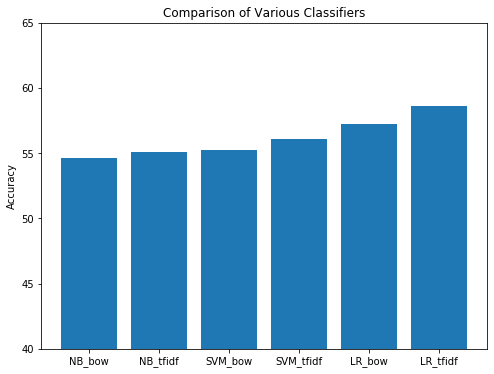

In [88]:
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align='center')
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Accuracy')
plt.title('Comparison of Various Classifiers')
plt.ylim([40, 65])
plt.show()

Using the best possible model to predict for the test data

In [89]:
test_data_tfidf = tfidf_matrix[31962:]

In [90]:
test_pred = lreg.predict_proba(test_data_tfidf)

In [91]:
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_data['label'] = test_pred_int

In [92]:
test_data[test_data['label']==0]

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,0
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0
17195,49158,"happy, at work conference: right mindset leads...",0


In [93]:
test_data[test_data['label']==1]

,id,tweet,label
19,31982,thought factory: bbc neutrality on right wing ...,1
26,31989,chick gets fucked hottest naked lady,1
30,31993,i'll #never be #120 #again i'm #i'm a #thick...,1
33,31996,suppo the #taiji fisherman! no bullying! no ra...,1
42,32005,@user @user trumps invested billions into saud...,1
...,...,...,...
17128,49091,@user the uk governmentâs new #anti-semitism...,1
17148,49111,we grew up fucked upð¤ its fucked upð¥ i'm...,1
17176,49139,@user @user are the most racist pay ever!!!!!,1
17188,49151,"black professor demonizes, proposes nazi style...",1


In [94]:
result = test_data[['id','label']]
result.to_csv('result.csv', index=False)

In [95]:
res = pd.read_csv(r'F:\Internship\Project_data\result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
